In [24]:
#pip install pulp
#pip install networkx
#pip install criticalpath
#pip install pulp

In [25]:
#Importing the necessary library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from criticalpath import Node
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go

In [26]:
# Defining Forward , Backward pass, slack and critical pass..First forward pass
def forward_pass(df):
    ES = [0] * len(df)
    EF = [0] * len(df)

    for i, row in df.iterrows():
        if row['Predecessors'] == 'None':  # If no predecessors, start at time 0
            ES[i] = 0
        else:
            preds = row['Predecessors'].split(', ')  # Get all predecessors
            ES[i] = max([EF[df[df['Task'] == p].index[0]] for p in preds])  # Max EF of predecessors
        EF[i] = ES[i] + row['Duration']  # EF = ES + Duration

    df['ES'] = ES
    df['EF'] = EF
    return df

# Backward pass
def backward_pass(df):
    LS = [0] * len(df)
    LF = [0] * len(df)

    max_EF = df['EF'].max()
    for i in reversed(range(len(df))):
        row = df.iloc[i]
        # Check if the task has successors (tasks with this task as predecessor)
        successors = df[df['Predecessors'].str.contains(row['Task'], na=False)]
        if successors.empty:  # If no successors, set LF to max EF
            LF[i] = max_EF
        else:
            LF[i] = min([LS[df[df['Task'] == s].index[0]] for s in successors['Task']])
        LS[i] = LF[i] - row['Duration']

    df['LS'] = LS
    df['LF'] = LF
    return df

# Calculate Slack and Critical Path
def calculate_slack_and_critical(df):
    df['Slack'] = df['LS'] - df['ES']
    df['Critical'] = df['Slack'] == 0  # Critical if Slack is 0
    return df

In [27]:
#Analysing first case
task = [('X1',{'Duration':1}),('X2',{'Duration':1}),('X3',{'Duration':7}),('X4',{'Duration':130}),('X5',{'Duration':1}),
        ('X6',{'Duration':8}),('X7',{'Duration':16}),('X8',{'Duration':50}),('X9',{'Duration':40}),('X10',{'Duration':4}),
        ('X11',{'Duration':10}),('X12',{'Duration':8}),('X13',{'Duration':8}),('X14',{'Duration':40}),('X15',{'Duration':12}),
        ('X16',{'Duration':52}),('X17',{'Duration':10}),('X18',{'Duration':10}),('X19',{'Duration':10}),('X20',{'Duration':45}),
        ('X21',{'Duration':26}),('X22',{'Duration':15}),('X23',{'Duration':26}),('X24',{'Duration':26}),('X25',{'Duration':26}),
        ('X26',{'Duration':10}),('X27',{'Duration':26}),('X28',{'Duration':70}),('X29',{'Duration':52}),('X30',{'Duration':4}),
        ('X31',{'Duration':4}),('X32',{'Duration':26}),('X33',{'Duration':26}),('X34',{'Duration':12}),('X35',{'Duration':26}),
        ('X36',{'Duration':10}),('X37',{'Duration':2}),('X38',{'Duration':2}),('X39',{'Duration':4}),('X40',{'Duration':10}),
        ('X41',{'Duration':1}),('X42',{'Duration':8}),('X43',{'Duration':8}),('X44',{'Duration':30}),('X45',{'Duration':15}),
        ('X46',{'Duration':4}),('X47',{'Duration':8}),('X48',{'Duration':15}),('X49',{'Duration':5}),('X50',{'Duration':26}),
        ('X51',{'Duration':10}),('X52',{'Duration':18}),('X53',{'Duration':5}),('X54',{'Duration':1}),('X55',{'Duration':75}),
        ('X56',{'Duration':4}),('X57',{'Duration':10}),('X58',{'Duration':8}),('X59',{'Duration':30}),('X60',{'Duration':20}),
        ('X61',{'Duration':8}),('X62',{'Duration':8}),('X63',{'Duration':15}),('X64',{'Duration':5}),('X65',{'Duration':26}),
        ('X66',{'Duration':10}),('X67',{'Duration':18}),('X68',{'Duration':5}),('X69',{'Duration':1}),('X70',{'Duration':52}),
        ('X71',{'Duration':4}),('X72',{'Duration':10}),('X73',{'Duration':8}),('X74',{'Duration':30}),('X75',{'Duration':10}),
        ('X76',{'Duration':4}),('X77',{'Duration':0}),('X78',{'Duration':4}),('X79',{'Duration':10}),('X80',{'Duration':8}),
        ('X81',{'Duration':26}),('X82',{'Duration':10}),('X83',{'Duration':52}),('X84',{'Duration':10}),('X85',{'Duration':0}),
        ('X86',{'Duration':6}),('X87',{'Duration':8}),('X88',{'Duration':26}),('X89',{'Duration':26}),('X90',{'Duration':8}),
        ('X91',{'Duration':40}),('X92',{'Duration':2}),('X93',{'Duration':2}),('X94',{'Duration':8}),('X95',{'Duration':0}),
        ('X96',{'Duration':4}),('X97',{'Duration':10}),('X98',{'Duration':26}),('X99',{'Duration':26}),('X100',{'Duration':10}),
        ('X101',{'Duration':40}),('X102',{'Duration':2}),('X103',{'Duration':4}),('X104',{'Duration':0.2}),
        ('X105',{'Duration':20}),('X106',{'Duration':14}),('X107',{'Duration':10}),('X108',{'Duration':26}),
        ('X109',{'Duration':10}),('X110',{'Duration':26}),('X111',{'Duration':156}),('X112',{'Duration':20}),
        ('X113',{'Duration':10}),('X114',{'Duration':8}),('X115',{'Duration':52}),('X116',{'Duration':52}),
        ('X117',{'Duration':26}),('X118',{'Duration':26}),('X119',{'Duration':26}),('X120',{'Duration':20}),
        ('X121',{'Duration':12}),('X122',{'Duration':40}),('X123',{'Duration':12}),('X124',{'Duration':15}),
        ('X125',{'Duration':40}),('X126',{'Duration':15}),('X127',{'Duration':26}),('X128',{'Duration':52}),
        ('X129',{'Duration':52}),('X130',{'Duration':40}),('X131',{'Duration':26}),('X132',{'Duration':26}),
        ('X133',{'Duration':26}),('X134',{'Duration':26}),('X135',{'Duration':10}),('X136',{'Duration':52}),
        ('X137',{'Duration':0})]

# Define dependency
depend = [('X1','X4'),('X2','X4'),('X3','X4'),('X4','X9'),('X5','X6'),('X10','X6'),('X6','X7'),('X7','X8'),('X8','X9'),
          ('X10','X11'),('X11','X12'),('X12','X13'),('X13','X14'),('X14','X15'),('X15','X16'),('X23','X24'),('X24','X25'),
          ('X17','X18'),('X18','X19'),('X19','X20'),('X20','X21'),('X21','X22'),('X22','X26'),('X9','X26'),('X15','X26'),
          ('X25','X26'),('X27','X28'),('X28','X29'),('X29','X30'),('X27','X31'),('X31','X32'),('X31','X33'),('X31','X34'),
          ('X32','X35'),('X33','X35'),('X34','X35'),('X35','X36'),('X35','X37'),('X36','X38'),('X37','X38'),('X30','X38'),
          ('X39','X40'),('X39','X41'),('X41','X42'),('X42','X43'),('X43','X44'),('X44','X45'),('X40','X45'),('X45','X46'),
          ('X38','X77'),('X46','X77'),('X27','X47'),('X47','X48'),('X48','X56'),('X48','X51'),('X48','X49'),('X48','X53'),
          ('X56','X57'),('X57','X58'),('X58','X59'),('X51','X52'),('X52','X55'),('X49','X50'),('X50','X55'),('X53','X54'),
          ('X50','X55'),('X54','X55'),('X59','X60'),('X55','X60'),('X60','X61'),('X47','X62'),('X62','X63'),('X63','X71'),
          ('X63','X66'),('X63','X64'),('X63','X68'),('X71','X72'),('X72','X73'),('X73','X74'),('X66','X67'),('X64','X65'),
          ('X68','X69'),('X65','X70'),('X67','X70'),('X69','X70'),('X70','X75'),('X74','X75'),('X75','X76'),('X78','X79'),
          ('X79','X80'),('X79','X81'),('X80','X82'),('X81','X83'),('X82','X83'),('X78','X84'),('X84','X85'),('X85','X86'),
          ('X85','X90'),('X86','X87'),('X87','X88'),('X90','X91'),('X91','X92'),('X83','X89'),('X88','X89'),('X92','X89'),
          ('X89','X93'),('X93','X94'),('X94','X95'),('X95','X96'),('X96','X97'),('X97','X98'),('X98','X99'),('X96','X100'),
          ('X100','X101'),('X101','X102'),('X102','X99'),('X99','X103'),('X124','X125'),('X125','X126'),('X125','X127'),
          ('X125','X128'),('X126','X129'),('X127','X129'),('X128','X130'),('X130','X131'),('X131','X135'),('X132','X133'),
          ('X133','X134'),('X134','X135'),('X104','X105'),('X105','X106'),('X105','X109'),('X105','X112'),('X105','X117'),
          ('X105','X107'),('X106','X110'),('X109','X110'),('X107','X108'),('X108','X111'),('X110','X111'),('X111','X116'),
          ('X112','X113'),('X113','X114'),('X114','X115'),('X115','X116'),('X116','X123'),('X112','X120'),('X120','X121'),
          ('X121','X122'),('X122','X123'),('X117','X118'),('X118','X119'),('X119','X123'),('X112','X113'),('X103','X136'),
          ('X135','X136'),('X123','X136'),('X136','X137'),('X25','X135'),('X61','X135'),('X76','X135'),('X38','X136'),('X46','X136')]

In [28]:
#Defining the points for plotting graphs
pos_nodes = {"X1": (12, 94), 
             "X2": (12, 90), 
             "X3": (12, 84), 
             "X4": (30, 90), 
             "X5": (12, 78),
             "X10": (12, 73),
             "X6": (30, 78),
             "X7": (45, 78),
             "X8": (60, 78),
             "X9": (78, 78),
             "X11": (30, 72),
             "X12": (46, 72),
             "X13": (63, 72),
             "X14": (76, 72),
             "X15": (95, 72), 
             "X16": (105, 72), 
             "X17": (30, 96), 
             "X18": (46, 96), 
             "X19": (63, 96),
             "X20": (78, 96),
             "X21": (96, 96),
             "X22": (111, 96),
             "X23": (79, 66),
             "X24": (95, 66),
             "X25": (111, 66),
             "X26": (130, 78),
             "X27": (150, 78),
             "X28": (162, 78),
             "X29": (174, 78), 
             "X30": (186, 78), 
             "X31": (148, 75), 
             "X32": (162, 72), 
             "X33": (162, 69),
             "X34": (162, 75),
             "X35": (174, 75),
             "X36": (186, 75),
             "X37": (186, 72),
             "X38": (198, 75),
             "X39": (180, 66),
             "X40": (210, 63),
             "X41": (192, 66),
             "X42": (204, 66),
             "X43": (216, 66), 
             "X44": (231, 66), 
             "X45": (240, 66), 
             "X46": (255, 66), 
             "X47": (169, 90),
             "X48": (180, 90),
             "X49": (192, 87),
             "X50": (204, 87),
             "X51": (192, 93),
             "X52": (207, 93),
             "X53": (192, 84),
             "X54": (207, 84),
             "X55": (216, 90),
             "X56": (186, 96),
             "X57": (198, 96), 
             "X58": (213, 96), 
             "X59": (222, 93), 
             "X60": (231, 90), 
             "X61": (243, 90),
             "X62": (201, 81),
             "X63": (213, 81),
             "X64": (228, 78),
             "X65": (237, 78),
             "X66": (225, 81),
             "X67": (237, 81),
             "X68": (225, 75),
             "X69": (237, 75),
             "X70": (251, 81),
             "X71": (219, 84), 
             "X72": (234, 84), 
             "X73": (243, 84), 
             "X74": (255, 84), 
             "X75": (264, 81),
             "X76": (273, 81),
             "X77": (282, 66),
             "X78": (18, 51),
             "X79": (36, 51),
             "X80": (51, 51),
             "X81": (60, 57),
             "X82": (69, 51),
             "X83": (81, 51),
             "X84": (36, 45),
             "X85": (51, 45), 
             "X86": (66, 45), 
             "X87": (84, 45), 
             "X88": (96, 45), 
             "X89": (114, 45),
             "X90": (66, 42),
             "X91": (81, 42),
             "X92": (96, 42),
             "X93": (129, 45),
             "X94": (144, 45),
             "X95": (159, 45),
             "X96": (174, 45),
             "X97": (189, 45),
             "X98": (207, 45),
             "X99": (219, 45), 
             "X100": (183, 42), 
             "X101": (198, 42), 
             "X102": (216, 42), 
             "X103": (237, 45),
             "X104": (99, 12),
             "X105": (114, 12),
             "X106": (129, 21),
             "X107": (144, 18),
             "X108": (159, 18),
             "X109": (129, 18),
             "X110": (144, 21),
             "X111": (159, 21),
             "X112": (132, 12),
             "X113": (144, 12), 
             "X114": (159, 12), 
             "X115": (177, 12), 
             "X116": (189, 12), 
             "X117": (144, 6),
             "X118": (159, 6),
             "X119": (174, 6),
             "X120": (144, 9),
             "X121": (159, 9),
             "X122": (174, 9),
             "X123": (207, 12),
             "X124": (48, 27),
             "X125": (66, 27),
             "X126": (81, 36),
             "X127": (81, 33), 
             "X128": (81, 30), 
             "X129": (96, 33), 
             "X130": (96, 30), 
             "X131": (114, 27),
             "X132": (81, 22.5),
             "X133": (99, 22.5),
             "X134": (114, 22.5),
             "X135": (129, 27),
             "X136": (237, 27),
             "X137": (244, 27),
            } 

In [29]:
# Create task dictionary
taskDict = {t[0]: t[1]['Duration'] for t in task}

# Create predecessor and successor dictionaries
predecessors = {t[0]: [] for t in task}
successors = {t[0]: [] for t in task}

# Populate predecessor and successor dictionaries
for dep in depend:
    predecessors[dep[1]].append(dep[0])
    successors[dep[0]].append(dep[1])

# Convert the data into a DataFrame for easy viewing
data = {
    'Task': list(taskDict.keys()),
    'Duration': list(taskDict.values()),
    'Predecessors': [', '.join(predecessors[task]) if predecessors[task] else 'None' for task in taskDict],
    'Successors': [', '.join(successors[task]) if successors[task] else 'None' for task in taskDict]
}

df = pd.DataFrame(data)

In [30]:
# Process the data
df = forward_pass(df)
df = backward_pass(df)
df = calculate_slack_and_critical(df)

# Display the DataFrame
df

,Task,Duration,Predecessors,Successors,ES,EF,LS,LF,Slack,Critical
0,X1,1.0,None,X4,0.0,1.0,-263.0,-262.0,-263.0,False
1,X2,1.0,None,X4,0.0,1.0,-263.0,-262.0,-263.0,False
2,X3,7.0,None,X4,0.0,7.0,-269.0,-262.0,-269.0,False
3,X4,130.0,"X1, X2, X3",X9,7.0,137.0,-262.0,-132.0,-269.0,False
4,X5,1.0,None,X6,0.0,1.0,-229.0,-228.0,-229.0,False
...,...,...,...,...,...,...,...,...,...,...
132,X133,26.0,X132,X134,26.0,52.0,218.2,244.2,192.2,False
133,X134,26.0,X133,X135,52.0,78.0,244.2,270.2,192.2,False
134,X135,10.0,"X131, X134, X25, X61, X76",X136,183.0,193.0,270.2,280.2,87.2,False
135,X136,52.0,"X103, X135, X123, X38, X46",X137,280.2,332.2,280.2,332.2,0.0,True


In [31]:
G = nx.DiGraph()
     
#add nodes and linkegs
G.add_nodes_from(task)
G.add_edges_from(depend)

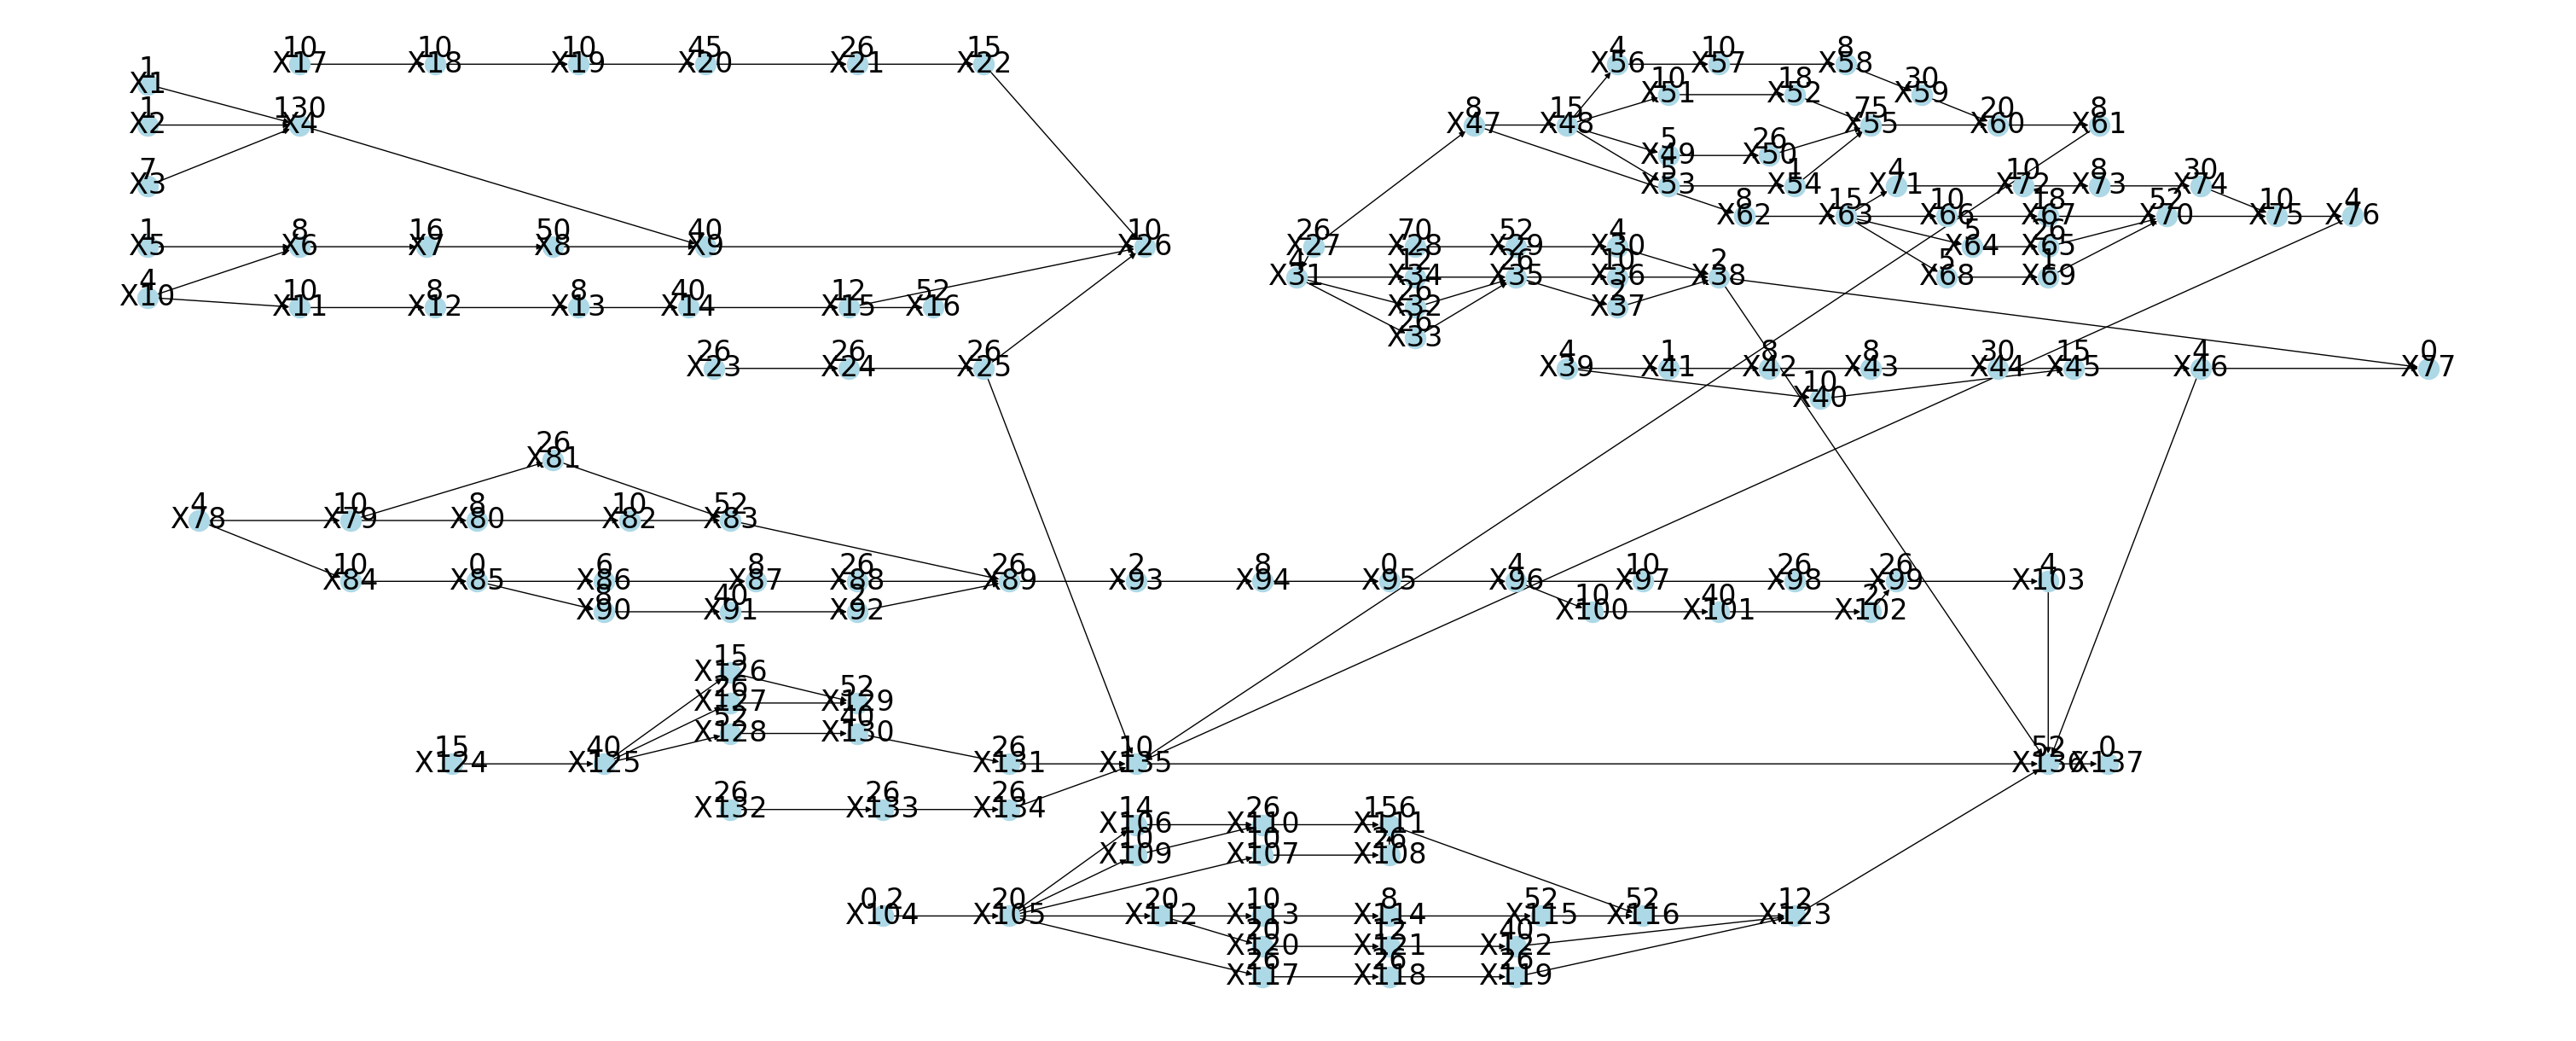

In [32]:
# draw the nodes
plt.figure(figsize=(30, 12))
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=10, font_size=24)


# set up the (arbitrary) positions of the durations labels (attributes):
pos_attrs = {node:(coord[0], coord[1] + 1.5) for node, coord in pos_nodes.items()}
attrs = nx.get_node_attributes(G, 'Duration')

# draw (write) the node attributes (duration)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs, font_size=24)


# set a little margin (padding) for the graph so the labels are not cut off
plt.margins(.01)
plt.savefig("Network.png")

In [33]:
# initialize the critical path package
proj = Node('Project')

#add task and duration

for t in task:
  proj.add(Node(t[0],duration=t[1]["Duration"] ))

#add dependency

for d in depend:
  proj.link(d[0],d[1])

# upadate

proj.update_all()

In [34]:
# proj.get_critical_path() will return a list of nodes
# however, we want to store them as strings so that they can be easily used for visualization later

crit_path = [str(n) for n in proj.get_critical_path()]

# get the project completion time.

total_time = proj.duration

print(f"The critical path: {crit_path}")
print("-"*45)
print(f"The project completion time: {total_time} weeks")

The critical path: ['X104', 'X105', 'X106', 'X110', 'X111', 'X116', 'X123', 'X136', 'X137']
---------------------------------------------
The project completion time: 332.2 weeks


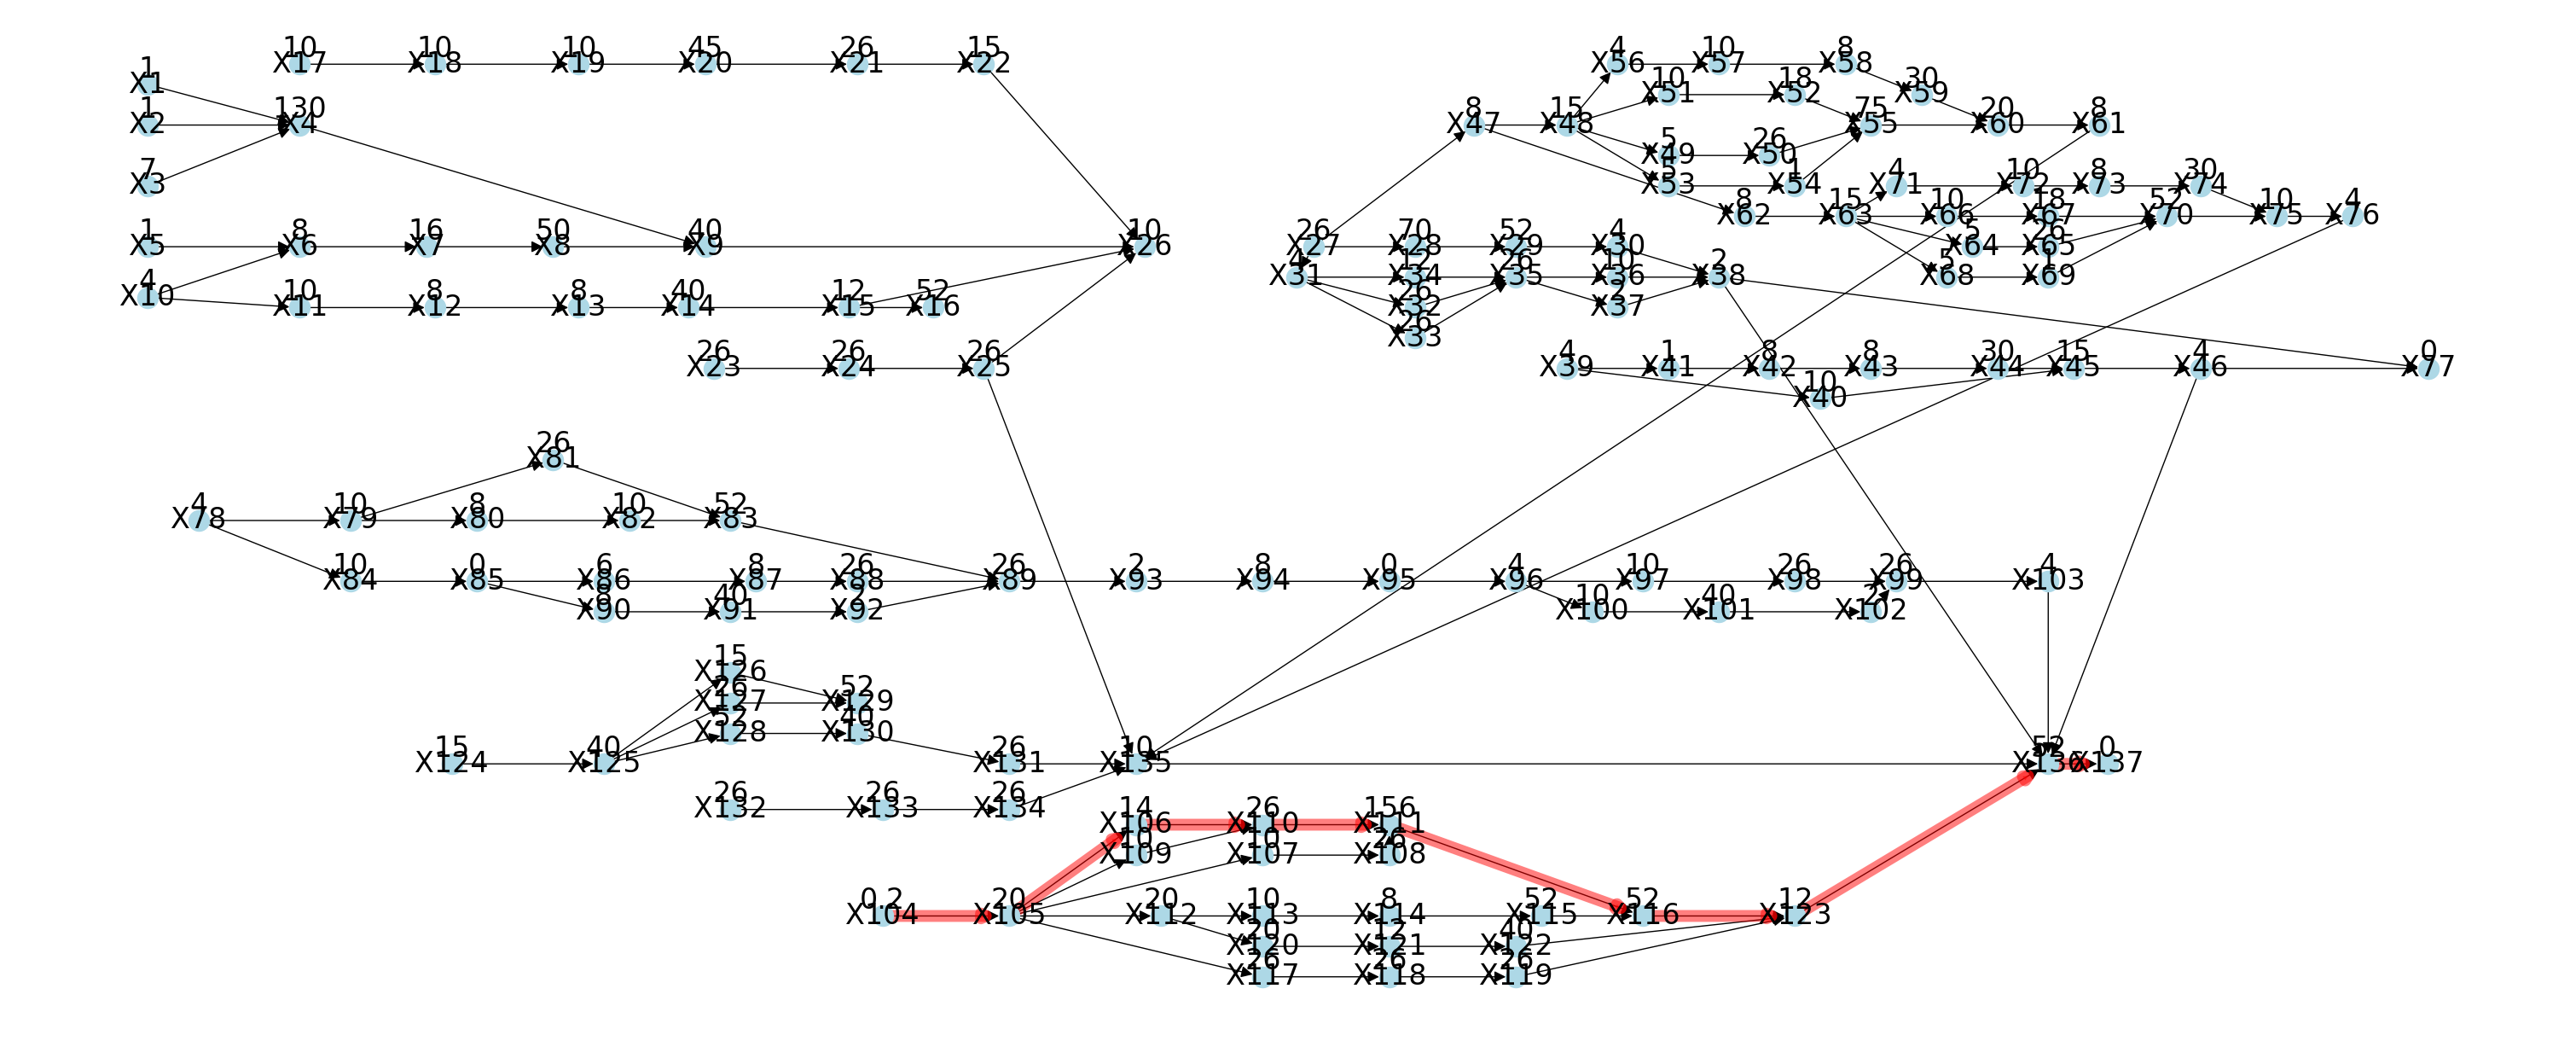

In [35]:
plt.figure(figsize=(30, 12))
# create a list of edges using the current critical path list:
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])]

# first, recreate the network visualization:
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=20,font_size=24)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs,font_size=24)

# now add the critical path as an additional layer on top of the original graph:
nx.draw_networkx_edges(G, pos=pos_nodes, edgelist=crit_edges, width=10, alpha=0.5, edge_color='r')

# again, leaving some margin so the labels are not cut off
plt.margins(0.01)

plt.savefig("critical.png")

In [49]:
# Define critical edges
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])]

# Get edge data for Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos_nodes[edge[0]]
    x1, y1 = pos_nodes[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Critical edges (red line)
crit_edge_x = []
crit_edge_y = []
for edge in crit_edges:
    x0, y0 = pos_nodes[edge[0]]
    x1, y1 = pos_nodes[edge[1]]
    crit_edge_x.append(x0)
    crit_edge_x.append(x1)
    crit_edge_x.append(None)
    crit_edge_y.append(y0)
    crit_edge_y.append(y1)
    crit_edge_y.append(None)

# Trace for regular edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines')

# Trace for critical edges
crit_edge_trace = go.Scatter(
    x=crit_edge_x, y=crit_edge_y,
    line=dict(width=5, color='red'),
    hoverinfo='none',
    mode='lines')

# Node trace
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos_nodes[node]
    node_x.append(x)
    node_y.append(y)

# Set hover text with EST, EFT, LST, LFT, Slack from pandas DataFrame
node_text = []
for node in G.nodes():
    est = df[df['Task'] == node]['ES'].values[0]
    eft = df[df['Task'] == node]['EF'].values[0]
    lst = df[df['Task'] == node]['LS'].values[0]
    lft = df[df['Task'] == node]['LF'].values[0]
    slack = df[df['Task'] == node]['Slack'].values[0]

    node_text.append(f"Task: {node}<br>"
                     f"EST: {est}<br>"
                     f"EFT: {eft}<br>"
                     f"LST: {lst}<br>"
                     f"LFT: {lft}<br>"
                     f"Slack: {slack}")

# Node trace for Plotly with hover text
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    textposition='bottom center',
    hoverinfo='text',
    text=[node for node in G.nodes()],
    hovertext=node_text,
)

# Create figure with regular and critical edges
fig = go.Figure(data=[edge_trace, crit_edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Critical Path Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    annotations=[dict(
                        text="Critical Path Network",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()


In [36]:
#Analysing second case
task=[('X1',{'Duration':1}),('X2',{'Duration':1}),('X3',{'Duration':7}),('X4',{'Duration':130}),('X5',{'Duration':1}),
        ('X6',{'Duration':8}),('X7',{'Duration':16}),('X8',{'Duration':50}),('X9',{'Duration':40}),('X10',{'Duration':4}),
        ('X11',{'Duration':10}),('X12',{'Duration':8}),('X13',{'Duration':8}),('X14',{'Duration':40}),('X15',{'Duration':12}),
        ('X16',{'Duration':52}),('X17',{'Duration':10}),('X18',{'Duration':10}),('X19',{'Duration':10}),('X20',{'Duration':45}),
        ('X21',{'Duration':26}),('X22',{'Duration':15}),('X23',{'Duration':26}),('X24',{'Duration':26}),('X25',{'Duration':26}),
        ('X26',{'Duration':10}),('X27',{'Duration':26}),('X28',{'Duration':70}),('X29',{'Duration':52}),('X30',{'Duration':4}),
        ('X31',{'Duration':4}),('X32',{'Duration':26}),('X33',{'Duration':26}),('X34',{'Duration':12}),('X35',{'Duration':26}),
        ('X36',{'Duration':10}),('X37',{'Duration':2}),('X38',{'Duration':2}),('X39',{'Duration':4}),('X40',{'Duration':10}),
        ('X41',{'Duration':1}),('X42',{'Duration':8}),('X43',{'Duration':8}),('X44',{'Duration':30}),('X45',{'Duration':15}),
        ('X46',{'Duration':4}),('X47',{'Duration':8}),('X48',{'Duration':15}),('X49',{'Duration':5}),('X50',{'Duration':26}),
        ('X51',{'Duration':10}),('X52',{'Duration':18}),('X53',{'Duration':5}),('X54',{'Duration':1}),('X55',{'Duration':75}),
        ('X56',{'Duration':4}),('X57',{'Duration':10}),('X58',{'Duration':8}),('X59',{'Duration':30}),('X60',{'Duration':20}),
        ('X61',{'Duration':8}),('X62',{'Duration':8}),('X63',{'Duration':15}),('X64',{'Duration':5}),('X65',{'Duration':26}),
        ('X66',{'Duration':10}),('X67',{'Duration':18}),('X68',{'Duration':5}),('X69',{'Duration':1}),('X70',{'Duration':52}),
        ('X71',{'Duration':4}),('X72',{'Duration':10}),('X73',{'Duration':8}),('X74',{'Duration':30}),('X75',{'Duration':10}),
        ('X76',{'Duration':4}),('X77',{'Duration':0}),('X78',{'Duration':4}),('X79',{'Duration':10}),('X80',{'Duration':8}),
        ('X81',{'Duration':26}),('X82',{'Duration':10}),('X83',{'Duration':52}),('X84',{'Duration':10}),('X85',{'Duration':0}),
        ('X86',{'Duration':6}),('X87',{'Duration':8}),('X88',{'Duration':26}),('X89',{'Duration':26}),('X90',{'Duration':8}),
        ('X91',{'Duration':40}),('X92',{'Duration':2}),('X93',{'Duration':2}),('X94',{'Duration':8}),('X95',{'Duration':0}),
        ('X96',{'Duration':4}),('X97',{'Duration':10}),('X98',{'Duration':26}),('X99',{'Duration':26}),('X100',{'Duration':10}),
        ('X101',{'Duration':40}),('X102',{'Duration':2}),('X103',{'Duration':4}),('X104',{'Duration':26}),
        ('X105',{'Duration':52}),('X106',{'Duration':18}),('X107',{'Duration':26}),('X108',{'Duration':26}),
        ('X109',{'Duration':26}),('X110',{'Duration':26}),('X111',{'Duration':104}),('X112',{'Duration':26}),
        ('X113',{'Duration':10}),('X114',{'Duration':10}),('X115',{'Duration':52}),('X116',{'Duration':52}),
        ('X117',{'Duration':26}),('X118',{'Duration':26}),('X119',{'Duration':26}),('X120',{'Duration':26}),
        ('X121',{'Duration':26}),('X122',{'Duration':52}),('X123',{'Duration':12}),('X124',{'Duration':15}),
        ('X125',{'Duration':40}),('X126',{'Duration':15}),('X127',{'Duration':26}),('X128',{'Duration':52}),
        ('X129',{'Duration':52}),('X130',{'Duration':40}),('X131',{'Duration':26}),('X132',{'Duration':26}),
        ('X133',{'Duration':26}),('X134',{'Duration':26}),('X135',{'Duration':10}),('X136',{'Duration':52}),
        ('X137',{'Duration':0})]

# Define dependency
depend = [('X1','X4'),('X2','X4'),('X3','X4'),('X4','X9'),('X5','X6'),('X10','X6'),('X6','X7'),('X7','X8'),('X8','X9'),
          ('X10','X11'),('X11','X12'),('X12','X13'),('X13','X14'),('X14','X15'),('X15','X16'),('X23','X24'),('X24','X25'),
          ('X17','X18'),('X18','X19'),('X19','X20'),('X20','X21'),('X21','X22'),('X22','X26'),('X9','X26'),('X15','X26'),
          ('X25','X26'),('X27','X28'),('X28','X29'),('X29','X30'),('X27','X31'),('X31','X32'),('X31','X33'),('X31','X34'),
          ('X32','X35'),('X33','X35'),('X34','X35'),('X35','X36'),('X35','X37'),('X36','X38'),('X37','X38'),('X30','X38'),
          ('X39','X40'),('X39','X41'),('X41','X42'),('X42','X43'),('X43','X44'),('X44','X45'),('X40','X45'),('X45','X46'),
          ('X38','X77'),('X46','X77'),('X27','X47'),('X47','X48'),('X48','X56'),('X48','X51'),('X48','X49'),('X48','X53'),
          ('X56','X57'),('X57','X58'),('X58','X59'),('X51','X52'),('X52','X55'),('X49','X50'),('X50','X55'),('X53','X54'),
          ('X50','X55'),('X54','X55'),('X59','X60'),('X55','X60'),('X60','X61'),('X47','X62'),('X62','X63'),('X63','X71'),
          ('X63','X66'),('X63','X64'),('X63','X68'),('X71','X72'),('X72','X73'),('X73','X74'),('X66','X67'),('X64','X65'),
          ('X68','X69'),('X65','X70'),('X67','X70'),('X69','X70'),('X70','X75'),('X74','X75'),('X75','X76'),('X78','X79'),
          ('X79','X80'),('X79','X81'),('X80','X82'),('X81','X83'),('X82','X83'),('X78','X84'),('X84','X85'),('X85','X86'),
          ('X85','X90'),('X86','X87'),('X87','X88'),('X90','X91'),('X91','X92'),('X83','X89'),('X88','X89'),('X92','X89'),
          ('X89','X93'),('X93','X94'),('X94','X95'),('X95','X96'),('X96','X97'),('X97','X98'),('X98','X99'),('X96','X100'),
          ('X100','X101'),('X101','X102'),('X102','X99'),('X99','X103'),('X124','X125'),('X125','X126'),('X125','X127'),
          ('X125','X128'),('X126','X129'),('X127','X129'),('X128','X130'),('X130','X131'),('X131','X135'),('X132','X133'),
          ('X133','X134'),('X134','X135'),('X104','X105'),('X105','X106'),('X105','X109'),('X105','X112'),('X105','X117'),
          ('X105','X107'),('X106','X110'),('X109','X110'),('X107','X108'),('X108','X111'),('X110','X111'),('X111','X116'),
          ('X112','X113'),('X113','X114'),('X114','X115'),('X115','X116'),('X116','X123'),('X112','X120'),('X120','X121'),
          ('X121','X122'),('X122','X123'),('X117','X118'),('X118','X119'),('X119','X123'),('X112','X113'),('X103','X136'),
          ('X135','X136'),('X123','X136'),('X136','X137'),('X25','X135'),('X61','X135'),('X76','X135'),('X38','X136'),('X46','X136')]

In [37]:
# Create task dictionary
taskDict = {t[0]: t[1]['Duration'] for t in task}

# Create predecessor and successor dictionaries
predecessors = {t[0]: [] for t in task}
successors = {t[0]: [] for t in task}

# Populate predecessor and successor dictionaries
for dep in depend:
    predecessors[dep[1]].append(dep[0])
    successors[dep[0]].append(dep[1])

# Convert the data into a DataFrame for easy viewing
data = {
    'Task': list(taskDict.keys()),
    'Duration': list(taskDict.values()),
    'Predecessors': [', '.join(predecessors[task]) if predecessors[task] else 'None' for task in taskDict],
    'Successors': [', '.join(successors[task]) if successors[task] else 'None' for task in taskDict]
}

df = pd.DataFrame(data)

In [38]:
# Process the data
df = forward_pass(df)
df = backward_pass(df)
df = calculate_slack_and_critical(df)

# Display the DataFrame
df

,Task,Duration,Predecessors,Successors,ES,EF,LS,LF,Slack,Critical
0,X1,1,None,X4,0,1,-263,-262,-263,False
1,X2,1,None,X4,0,1,-263,-262,-263,False
2,X3,7,None,X4,0,7,-269,-262,-269,False
3,X4,130,"X1, X2, X3",X9,7,137,-262,-132,-269,False
4,X5,1,None,X6,0,1,-229,-228,-229,False
...,...,...,...,...,...,...,...,...,...,...
132,X133,26,X132,X134,26,52,236,262,210,False
133,X134,26,X133,X135,52,78,262,288,210,False
134,X135,10,"X131, X134, X25, X61, X76",X136,183,193,288,298,105,False
135,X136,52,"X103, X135, X123, X38, X46",X137,298,350,298,350,0,True


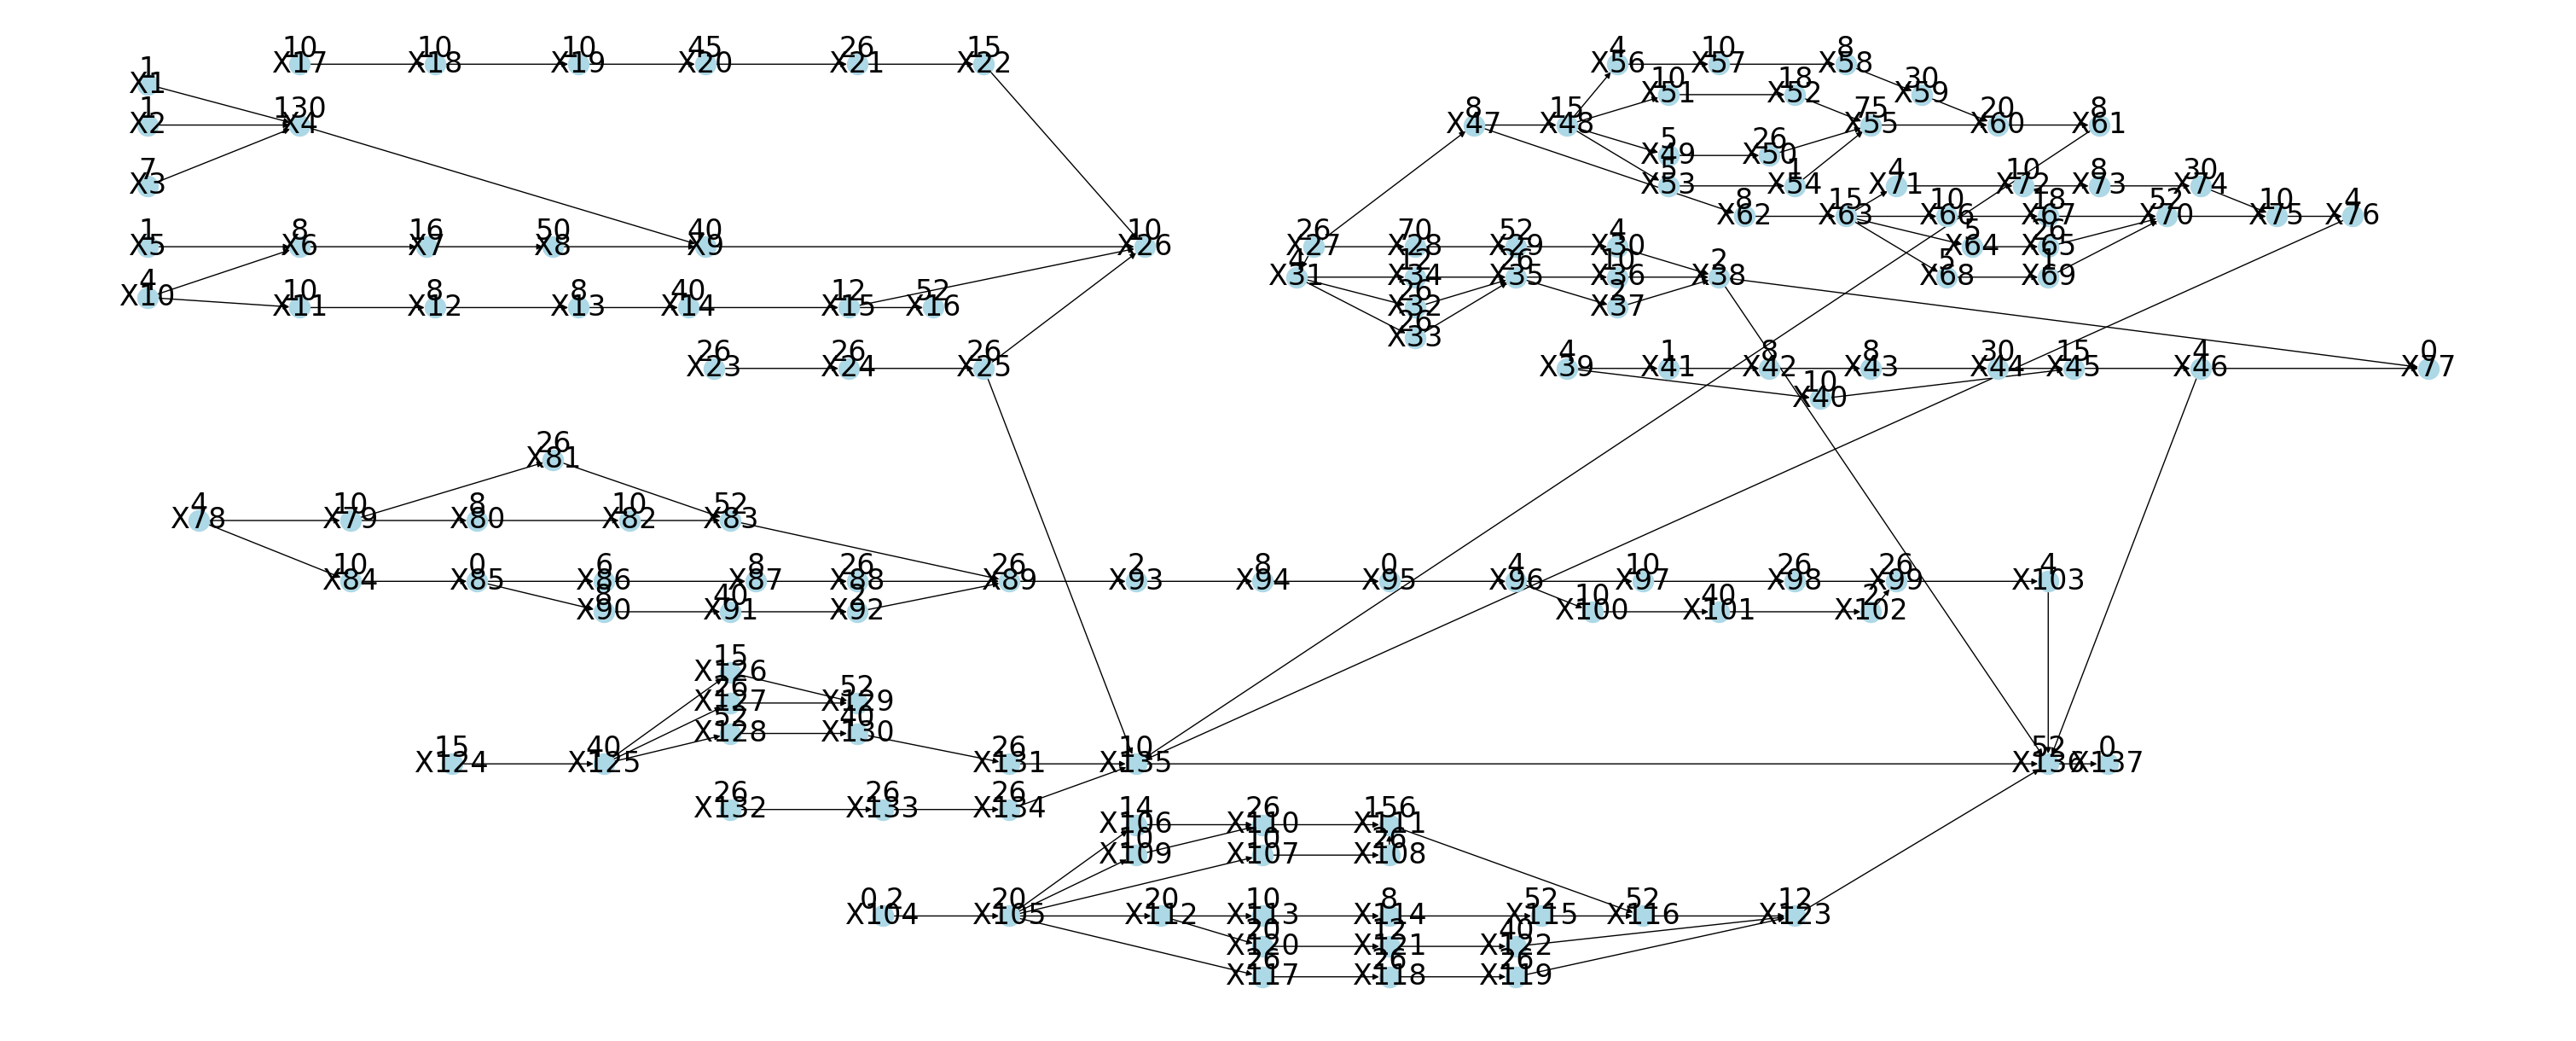

In [39]:
# draw the nodes
plt.figure(figsize=(30, 12))
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=10, font_size=24)


# set up the (arbitrary) positions of the durations labels (attributes):
pos_attrs = {node:(coord[0], coord[1] + 1.5) for node, coord in pos_nodes.items()}
attrs = nx.get_node_attributes(G, 'Duration')

# draw (write) the node attributes (duration)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs, font_size=24)


# set a little margin (padding) for the graph so the labels are not cut off
plt.margins(.01)
plt.savefig("Network.png")

In [40]:
# initialize the critical path package
proj = Node('Project')

#add task and duration

for t in task:
  proj.add(Node(t[0],duration=t[1]["Duration"] ))

#add dependency

for d in depend:
  proj.link(d[0],d[1])

# upadate

proj.update_all()

In [41]:
# proj.get_critical_path() will return a list of nodes
# however, we want to store them as strings so that they can be easily used for visualization later

crit_path = [str(n) for n in proj.get_critical_path()]

# get the project completion time.

total_time = proj.duration

print(f"The critical path: {crit_path}")
print("-"*45)
print(f"The project completion time: {total_time} weeks")

The critical path: ['X104', 'X105', 'X107', 'X108', 'X111', 'X116', 'X123', 'X136', 'X137']
---------------------------------------------
The project completion time: 350 weeks


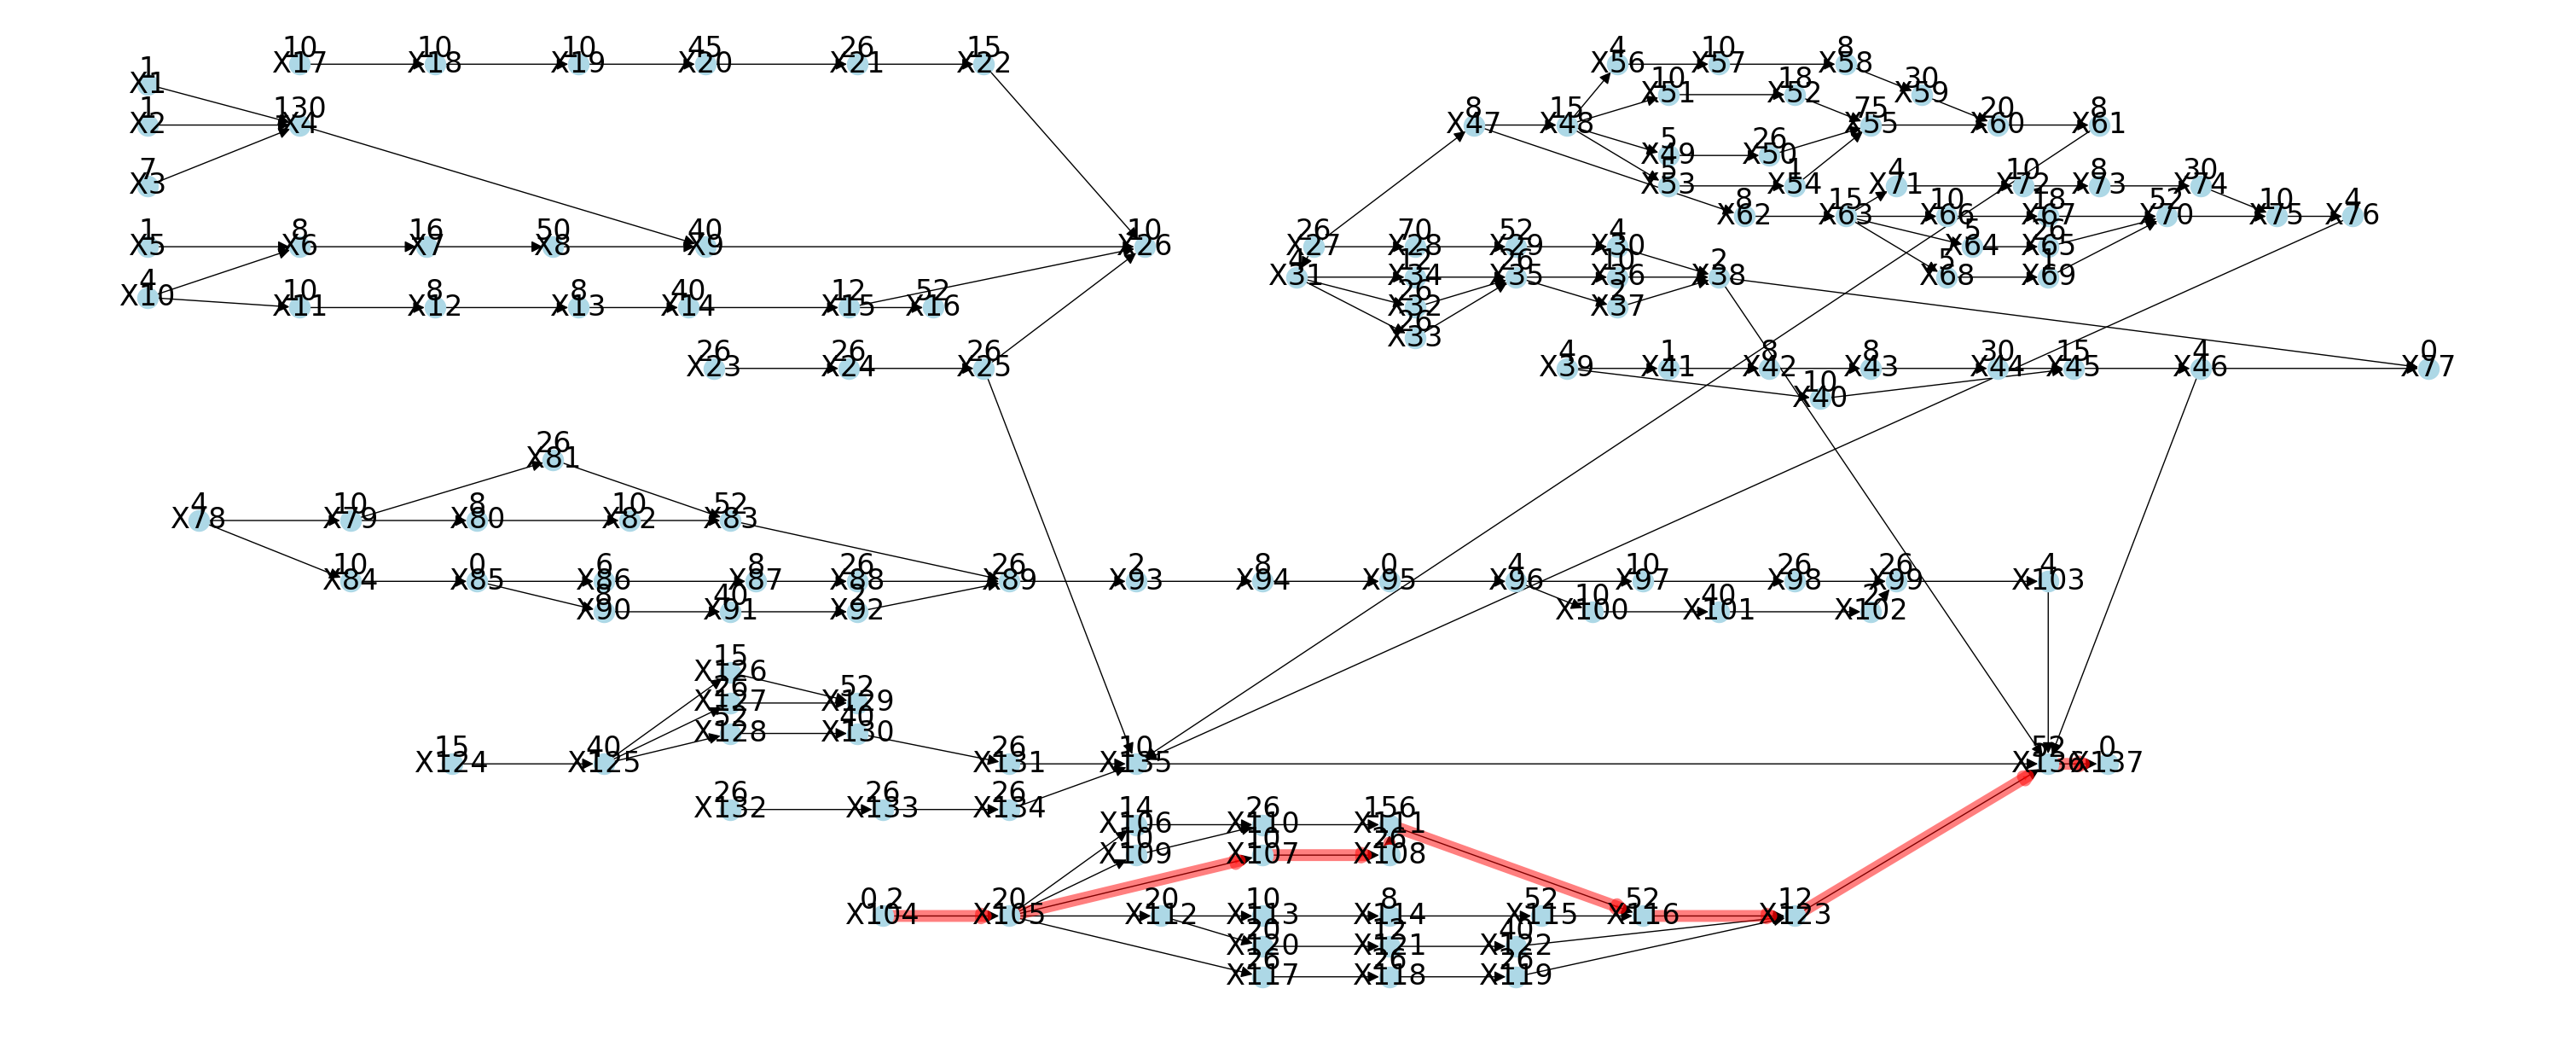

In [42]:
plt.figure(figsize=(30, 12))
# create a list of edges using the current critical path list:
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])]

# first, recreate the network visualization:
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=20,font_size=24)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs,font_size=24)

# now add the critical path as an additional layer on top of the original graph:
nx.draw_networkx_edges(G, pos=pos_nodes, edgelist=crit_edges, width=10, alpha=0.5, edge_color='r')

# again, leaving some margin so the labels are not cut off
plt.margins(0.01)

plt.savefig("critical.png")

In [50]:
# Define critical edges
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])]

# Get edge data for Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos_nodes[edge[0]]
    x1, y1 = pos_nodes[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Critical edges (red line)
crit_edge_x = []
crit_edge_y = []
for edge in crit_edges:
    x0, y0 = pos_nodes[edge[0]]
    x1, y1 = pos_nodes[edge[1]]
    crit_edge_x.append(x0)
    crit_edge_x.append(x1)
    crit_edge_x.append(None)
    crit_edge_y.append(y0)
    crit_edge_y.append(y1)
    crit_edge_y.append(None)

# Trace for regular edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='#888'),
    hoverinfo='none',
    mode='lines')

# Trace for critical edges
crit_edge_trace = go.Scatter(
    x=crit_edge_x, y=crit_edge_y,
    line=dict(width=5, color='red'),
    hoverinfo='none',
    mode='lines')

# Node trace
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos_nodes[node]
    node_x.append(x)
    node_y.append(y)

# Set hover text with EST, EFT, LST, LFT, Slack from pandas DataFrame
node_text = []
for node in G.nodes():
    est = df[df['Task'] == node]['ES'].values[0]
    eft = df[df['Task'] == node]['EF'].values[0]
    lst = df[df['Task'] == node]['LS'].values[0]
    lft = df[df['Task'] == node]['LF'].values[0]
    slack = df[df['Task'] == node]['Slack'].values[0]

    node_text.append(f"Task: {node}<br>"
                     f"EST: {est}<br>"
                     f"EFT: {eft}<br>"
                     f"LST: {lst}<br>"
                     f"LFT: {lft}<br>"
                     f"Slack: {slack}")

# Node trace for Plotly with hover text
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    textposition='bottom center',
    hoverinfo='text',
    text=[node for node in G.nodes()],
    hovertext=node_text,
    
)

# Create figure with regular and critical edges
fig = go.Figure(data=[edge_trace, crit_edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Critical Path Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    annotations=[dict(
                        text="Critical Path Network",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()
